# Extraccion de palabras y frases

Una de las técnicas más simples pero más poderosas para extraer información importante de documentos de texto no estructurados es la extracción de frases clave. Se define como el proceso o la técnica de extraer términos o frases clave importantes y relevantes de un cuerpo de texto no estructurado, de modo que los temas o temas centrales del documento o documentos de texto se capturen en estos documentos clave

Esta técnica pertenece a técnicas de extracción de información. La extracción de frases clave encuentra su uso en muchas áreas, incluidas las siguientes:

- Semántica
- Motores de búsqueda basados en consultas
- Sistemas de recomendación
- Sistemas de etiquetado
- Similitud de documentos
- Traducción

La extracción de frases clave suele ser el punto de partida para llevar a cabo tareas más complejas en análisis de texto o NLP, y el resultado de esto puede actuar como características para sistemas más complejos. Hay varios enfoques para la extracción de frases clave. Cubriremos las siguientes dos técnicas:

- Colocaciones (Collocations)
- Extracción de frases basada en etiquetas ponderadas (Weighted tag-based plhrase extraction)

## Colocaciones

El término colocación es en realidad un concepto tomado del análisis de corpus y la lingüística. **Es una secuencia o grupo de palabras que tienden a ocurrir con frecuencia**, de modo que esta frecuencia tiende a ser más de lo que podría denominarse como una ocurrencia aleatoria. 

Se pueden formar varios tipos de colocaciones en función de las partes del discurso de los diversos términos, como sustantivos, verbos, etc. Hay varias formas de extraer colocaciones, y una de las mejores es utilizar un enfoque de agrupación o segmentación de **n-gramas (n-grams)** en el que utilizando un corpus, contamos la frecuencia de cada n-grama y los clasificamos en función de su frecuencia de ocurrencia.

Veamos como funcionan los n grams:

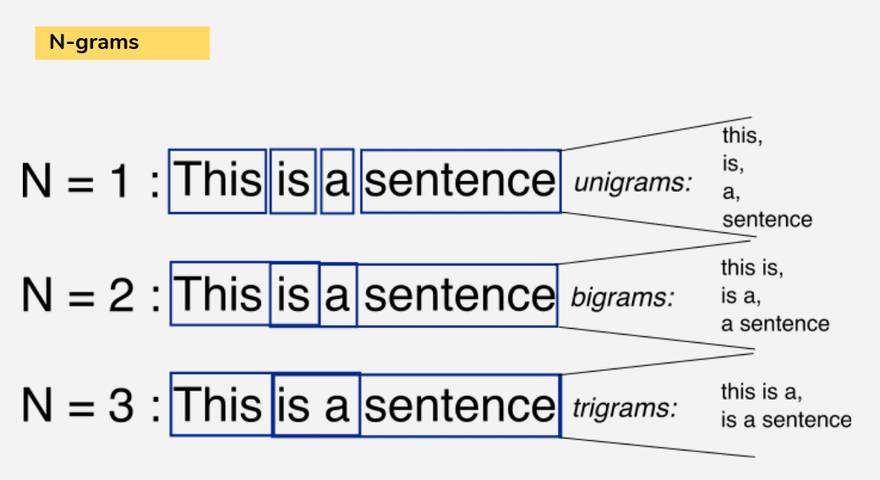

In [1]:
from IPython.display import Image
from IPython.display import display

display(Image(filename='ngrams.gif'))

Vamos a implementar esto desde cero para que lo entiendas y luego si usaremos herramientas de nltk para simplificar el proceso. Vamos a trabajar con un corpus de ejemplo de Gutenberg, "Alicia en el país de las maravillas" de Lewis Carroll como nuestro corpus.

Mira la funcion `text_normalizer.py` esta preparada para realizar lo siguiente:

1. Extraer oraciones
2. Remover secuencias HTML especiales
3. Expandir contracciones
4. Lemmatizar
5. Remover caracteres especiales
6. Remover stopwords

In [8]:
from nltk.corpus import gutenberg
import text_normalizer as tn
import nltk
from operator import itemgetter

In [9]:
# Cargar el corpus
alice = gutenberg.sents(fileids='carroll-alice.txt')
alice = [' '.join(ts) for ts in alice]
norm_alice = list(filter(None, tn.normalize_corpus(alice, text_lemmatization=False)))

In [17]:
print(type(alice))
print(len(alice))
alice[0]

<class 'list'>
1703


"[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]"

In [19]:
norm_alice[0:5]

['alice adventures wonderland lewis carroll',
 'chapter',
 'rabbit hole',
 'alice beginning get tired sitting sister bank nothing twice peeped book sister reading pictures conversations use book thought alice without pictures conversation',
 'considering mind well could hot day made feel sleepy stupid whether pleasure making daisy chain would worth trouble getting picking daisies suddenly white rabbit pink eyes ran close']

Ahora que hemos cargado nuestro corpus, definiremos una función para aplanar el corpus en una gran cadena de texto. La siguiente función nos ayudará a hacer eso para un corpus de documentos:

In [25]:
def flatten_corpus(corpus):
    return ' '.join([document.strip() 
                     for document in corpus])

Definiremos una función para calcular n-gramas en función de alguna lista de entrada de tokens y el parámetro n, que determina el grado del n-grama como un unigrama, bigrama, etc. El siguiente fragmento de código calcula n-gramas para una secuencia de entrada:

In [20]:
def compute_ngrams(sequence, n):
    return list(
            zip(*(sequence[index:] 
                     for index in range(n)))
    )

Esta función básicamente toma una secuencia de tokens y calcula una lista de listas que tienen secuencias donde cada lista contiene todos los elementos de la lista anterior excepto el primer elemento eliminado de la lista anterior. Construye n tales listas y luego las comprime todas juntas para darnos los n-gramas. Podemos ver la función en acción en una secuencia de muestra en el siguiente fragmento:

In [21]:
compute_ngrams([1,2,3,4], 2)

[(1, 2), (2, 3), (3, 4)]

In [28]:
compute_ngrams(['David','soy','yo','si'], 3)

[('David', 'soy', 'yo'), ('soy', 'yo', 'si')]

La salida anterior muestra bigramas y trigramas para una secuencia de entrada. Ahora utilizaremos esta función y nos basaremos en ella para generar los mejores n-gramas en función de su frecuencia de aparición. El siguiente fragmento de código nos ayuda a obtener el top de n-gramas

In [23]:
def get_top_ngrams(corpus, ngram_val=1, limit=5):

    corpus = flatten_corpus(corpus)
    tokens = nltk.word_tokenize(corpus)

    ngrams = compute_ngrams(tokens, ngram_val)
    ngrams_freq_dist = nltk.FreqDist(ngrams)
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(), 
                              key=itemgetter(1), reverse=True)
    sorted_ngrams = sorted_ngrams_fd[0:limit]
    sorted_ngrams = [(' '.join(text), freq) 
                     for text, freq in sorted_ngrams]

    return sorted_ngrams

Ahora usamos de la clase FreqDist de nltk para crear un contador de todos los n-gramas en función de su frecuencia y luego los ordenamos en función de su frecuencia y devolvemos los n-gramas superiores en función del límite de usuario especificado. Ahora calcularemos los principales bigramas y trigramas de nuestro corpus utilizando el siguiente fragmento de código:

In [29]:
get_top_ngrams(corpus=norm_alice, ngram_val=2,limit=10)

[('said alice', 123),
 ('mock turtle', 56),
 ('march hare', 31),
 ('said king', 29),
 ('thought alice', 26),
 ('white rabbit', 22),
 ('said hatter', 22),
 ('said mock', 20),
 ('said caterpillar', 18),
 ('said gryphon', 18)]

In [30]:
get_top_ngrams(corpus=norm_alice, ngram_val=3,limit=10)

[('said mock turtle', 20),
 ('said march hare', 10),
 ('poor little thing', 6),
 ('little golden key', 5),
 ('certainly said alice', 5),
 ('white kid gloves', 5),
 ('march hare said', 5),
 ('mock turtle said', 5),
 ('know said alice', 4),
 ('might well say', 4)]

Bien y ahora que pasa si tenemos el idiona español?. Vamos a trabajar con un ejemplo de datos reales, veamos de que se trata